# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


# Loading dataset.

In [2]:
df = pd.read_csv('kidney_disease.csv')
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# Check duplicate values

In [5]:
df.duplicated().sum()

0

In [6]:
# Check Null Values

df.isnull().sum()/len(df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [7]:
df = df.drop(['id'], axis = 1)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
# Find the unique value of columns
for i in df.columns:
    print("**********************", i , "***************************")
    print()
    print(set(df[i].tolist()))
    print()


********************** age ***************************

{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0, 12.0, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, nan, 55.0, 56.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 57.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, nan, 90.0, nan, nan, nan, 66.0, nan, nan, nan, nan}

********************** bp ***************************

{nan, 140.0, nan, nan, nan, nan, 50.0, 180.0, nan, nan, nan, 60.0, nan, nan, 70.0, nan, 80.0, nan, 90.0, 100.0, 110.0, 120.0}

********************** sg ***************************

{nan, 1.02, 1.005, 1.015, 1.01, 1.025, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [9]:
# this is a clinical dataset so it will be unfair to drop the columns which have more than 25% null values.

In [10]:
# In many columns there are some values which doesn't fit with the numerical dataset.
# like '\t - we have to convert this values to Nan'
# \t4600 -  we have to convert it into only numerical
# Treat specific values in the 'Packed Cell Volumne' column



In [11]:
df['pcv'] = df['pcv'].replace('\t?', float('nan'))
df['pcv'] = df['pcv'].str.replace('\t', '').astype(float)

In [12]:
df['rc'] = df['rc'].replace('t?',float('nan'))

In [13]:
df['wc'] = df['wc'].replace('\t?',float('nan'))
df['wc'] = df['wc'].str.replace('\t','').astype(float)


In [14]:
# Treat specific values in the dm column

df['dm'] = df['dm'].replace('\tno', 'no')
df['dm'] = df['dm'].replace('\tyes','yes')

In [15]:
df['cad'] = df['cad'].replace('\tno','no')

In [16]:
df['classification'] = df['classification'].str.strip()

In [17]:
# Here there are null values, so now treating null values.
df.isnull().sum()/len(df)*100

age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.75
wc                26.50
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [18]:
from sklearn.impute import SimpleImputer

#Treat Null values in Numerical Columns using SimpleImputer

numerical_columns = df.select_dtypes(include=['number']).columns
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

#Treat Null values in Categorical using SimpleImputer
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [19]:
df.isnull().sum()/len(df)*100

age               0.0
bp                0.0
sg                0.0
al                0.0
su                0.0
rbc               0.0
pc                0.0
pcc               0.0
ba                0.0
bgr               0.0
bu                0.0
sc                0.0
sod               0.0
pot               0.0
hemo              0.0
pcv               0.0
wc                0.0
rc                0.0
htn               0.0
dm                0.0
cad               0.0
appet             0.0
pe                0.0
ane               0.0
classification    0.0
dtype: float64

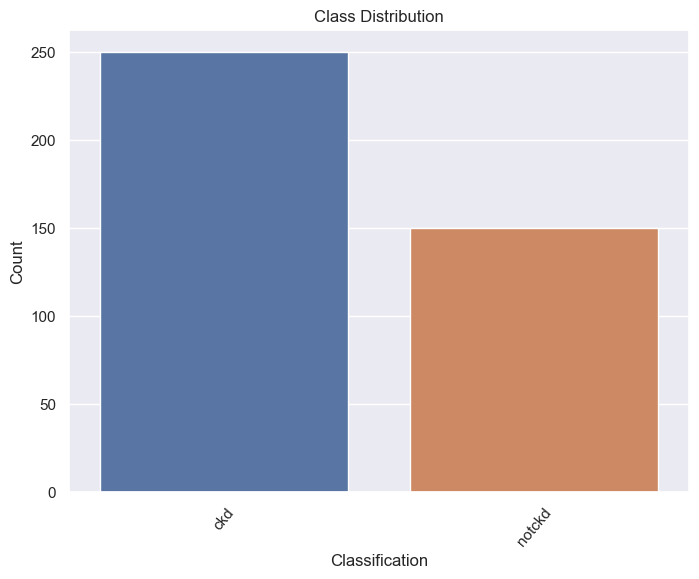

In [20]:
# Now there are no null values.
# Here we find to display the count of unique values in the classification column.
class_counts = df['classification'].value_counts()

#Create a bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

In [21]:
# it is difficult to recoginze column name, hence renaming the columns using the new_names
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [22]:
new_names_columns = {
    'age' : 'Age',
    'bp' : 'Blood Pressure',
    'sg' : 'Specific Gravity',
    'al' : 'Albumin',
    'su' : 'Sugar',
    'rbc' : 'Red Blood Cells',
    'pc' : 'Pus Cells',
    'pcc': 'Pus Cell Clumps',
    'ba' : 'Bacteria',
    'bgr': 'Blood Glucose Random',
    'bu' : 'Blood Urea',
    'sc' : 'Serum Creatinine',
    'sod' : 'Sodium',
    'pot' : 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed Cell Volume',
    'wc': 'White Blood Cell count',
    'rc': 'Red Blood Cell Count',
    'htn': 'Hypertension',
    'dm': 'Diabetes Mellitus',
    'cad': 'Coronary Artery Disease',
    'appet': 'Appetite',
    'pe': 'Pedal Edema',
    'ane': 'Anemia',
    'classification': 'Class'
}
df = df.rename(columns=new_names_columns)

In [23]:
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


# Visualization

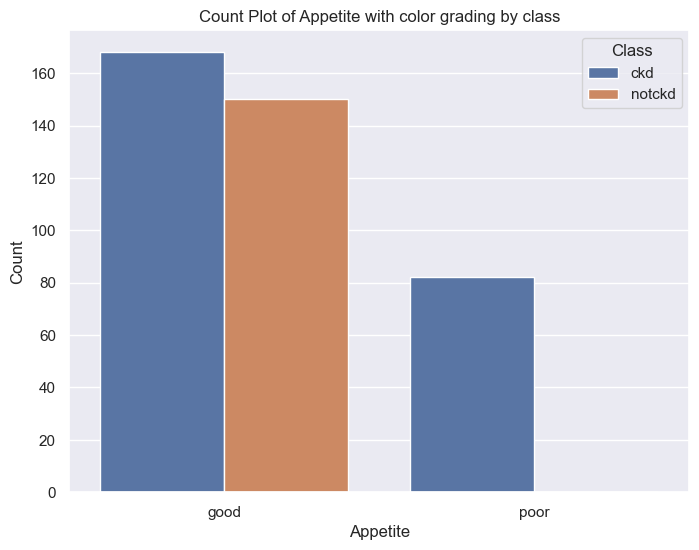

In [24]:
# Countplot of appetite with color grading by class

plt.figure(figsize=(8,6))
sns.countplot(x='Appetite',data=df,hue='Class')
plt.title('Count Plot of Appetite with color grading by class')
plt.xlabel('Appetite')
plt.ylabel('Count')
plt.show()

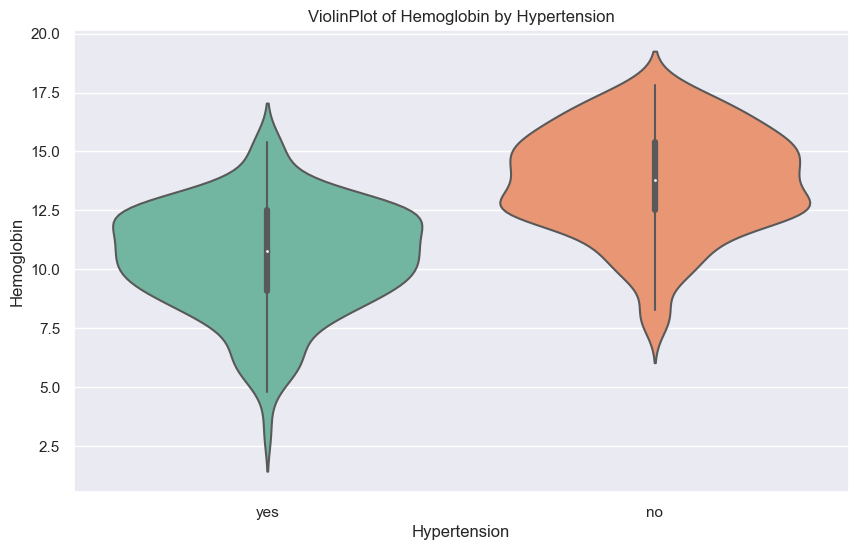

In [25]:
# Violin Plot of Hemoglobin by Hypertension
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Hypertension', y='Hemoglobin',palette='Set2')
plt.title('ViolinPlot of Hemoglobin by Hypertension')
plt.ylabel('Hemoglobin')
plt.xlabel('Hypertension')
plt.show()

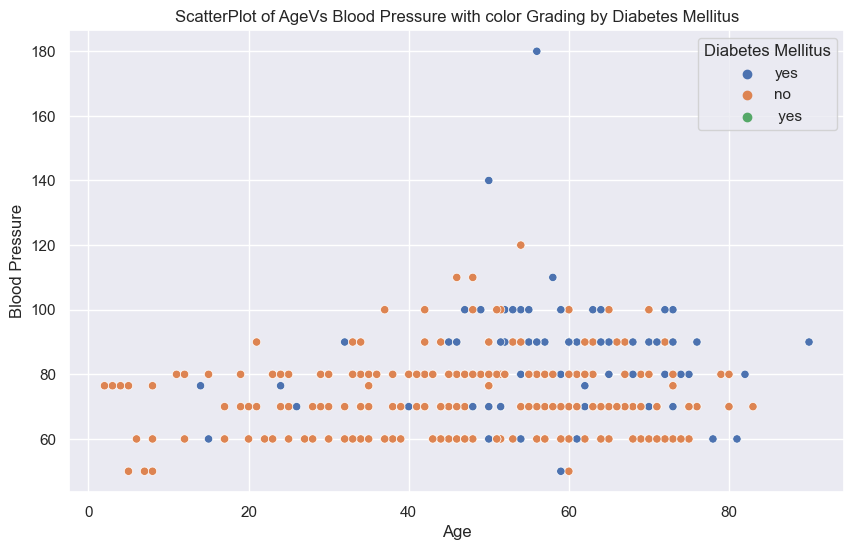

In [26]:
# ScatterPlot of AgeVs Blood Pressure with color Grading by Diabetes Mellitus.

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Age', y='Blood Pressure', hue='Diabetes Mellitus')
plt.title('ScatterPlot of AgeVs Blood Pressure with color Grading by Diabetes Mellitus')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend(title='Diabetes Mellitus')
plt.show()


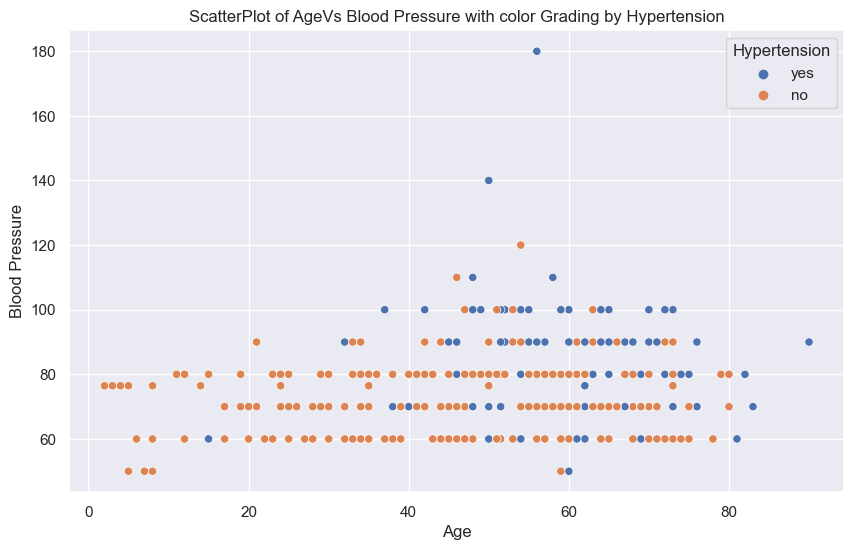

In [27]:
# ScatterPlot of AgeVs Blood Pressure with color Grading by hypertension.

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Age', y='Blood Pressure', hue='Hypertension')
plt.title('ScatterPlot of AgeVs Blood Pressure with color Grading by Hypertension')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend(title='Hypertension')
plt.show()

In [29]:
from mpl_toolkits.mplot3d import Axes3D

<function matplotlib.pyplot.show(close=None, block=None)>

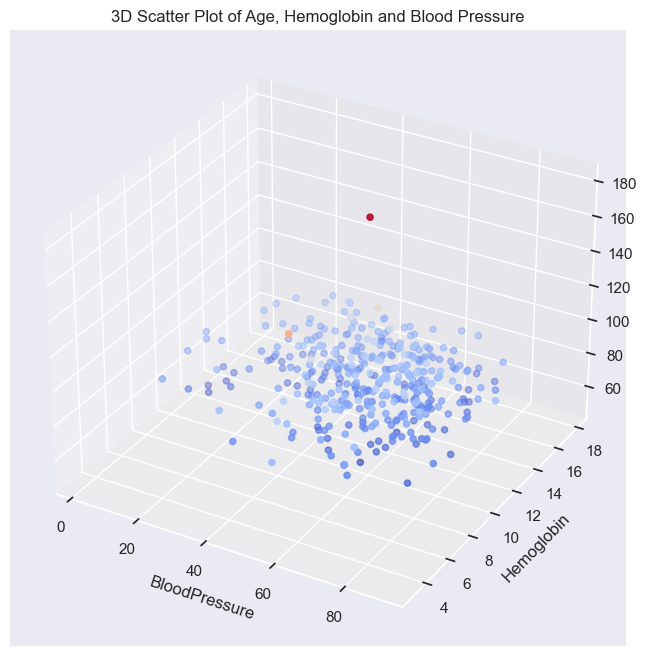

In [30]:
# Select data for the 3D plot

x = df['Age']
y = df['Hemoglobin']
z = df['Blood Pressure']

# creat a 3d scatter plot

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c=z,cmap='coolwarm')

#Set labels for axes
ax.set_xlabel('Age')
ax.set_ylabel('Hemoglobin')
ax.set_xlabel('BloodPressure')


# Set title
ax.set_title('3D Scatter Plot of Age, Hemoglobin and Blood Pressure')

# show the plot

plt.show

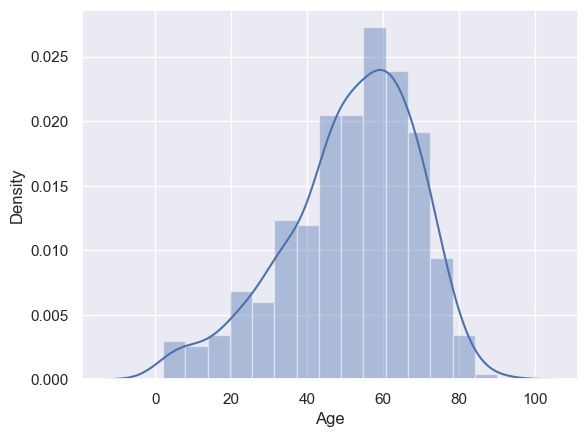

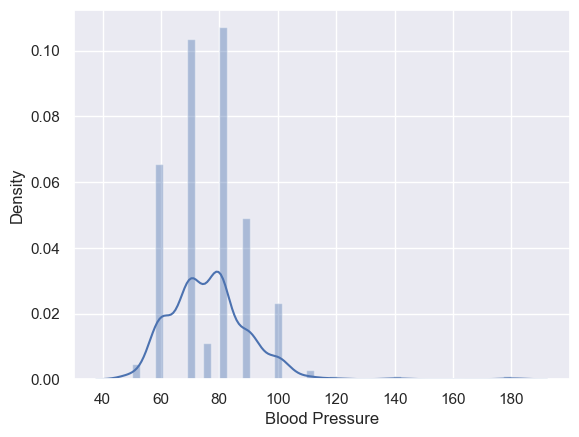

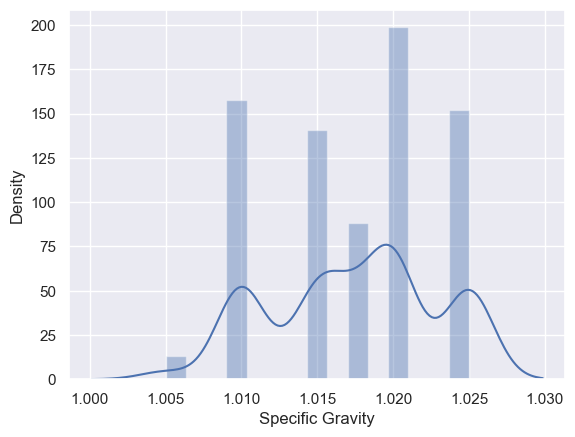

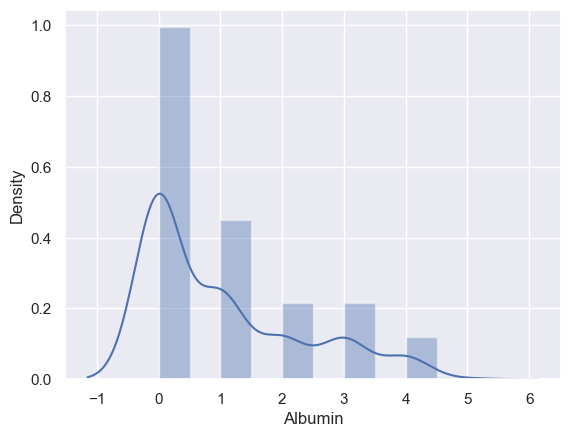

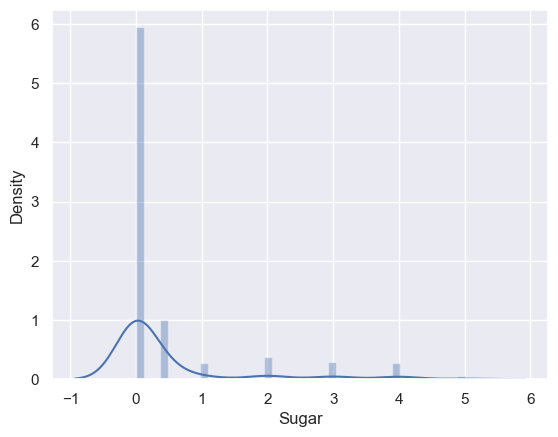

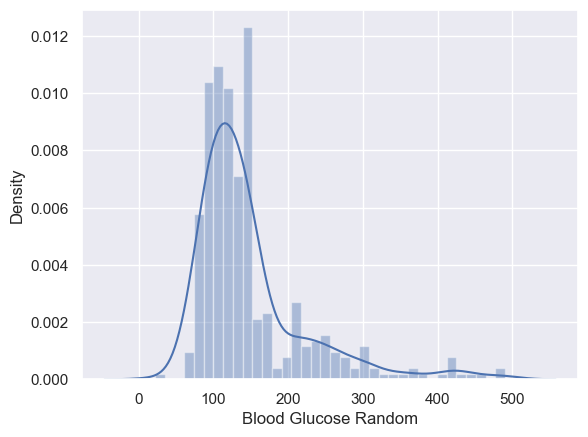

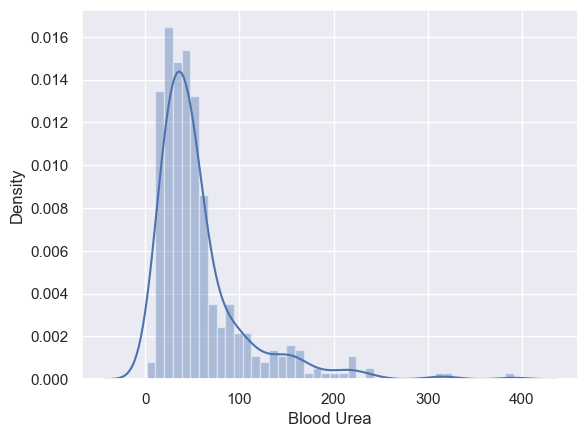

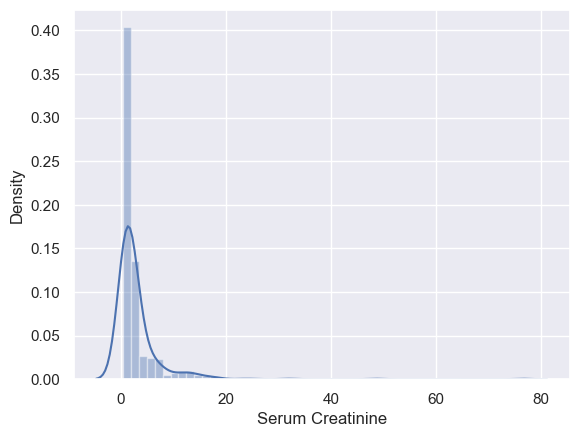

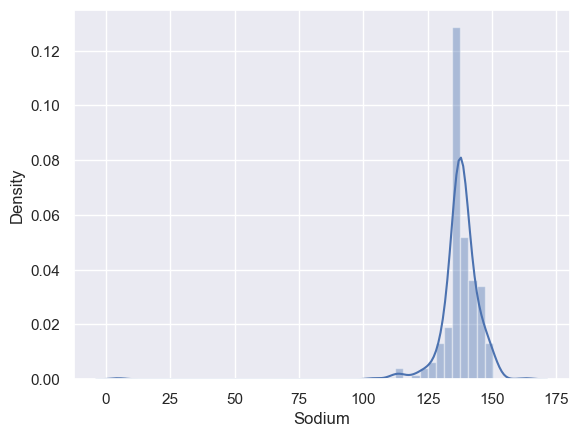

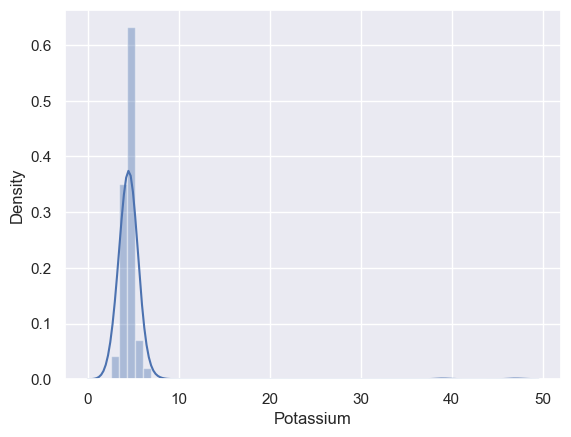

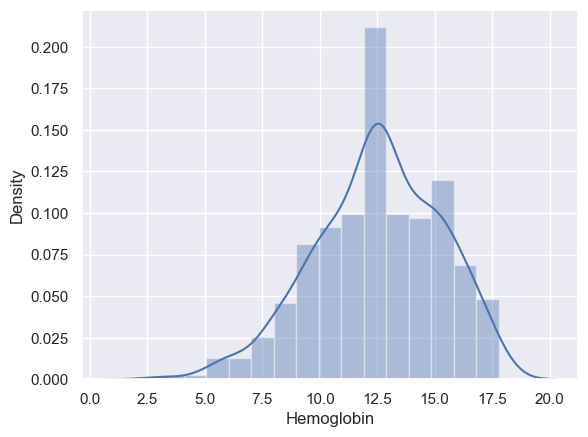

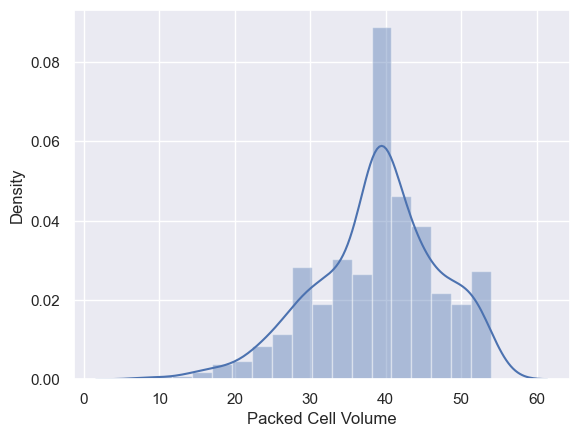

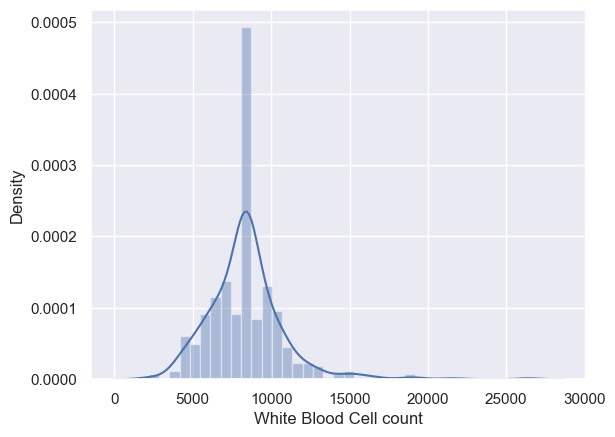

In [31]:
# Find the distribution of the dataset

def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns[0:]):
    distplots(i)

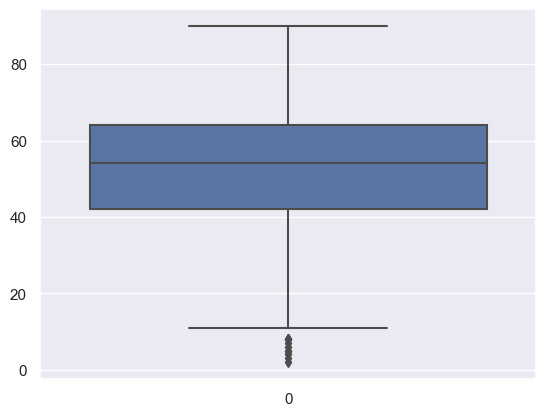

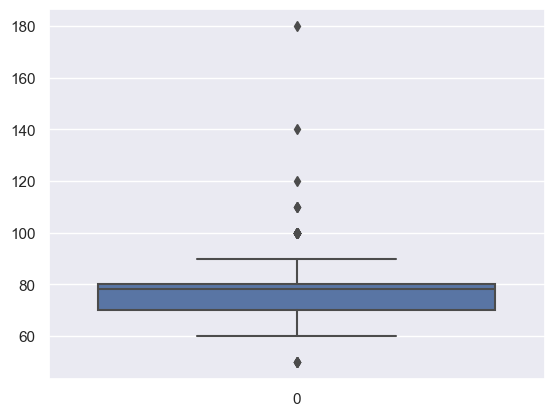

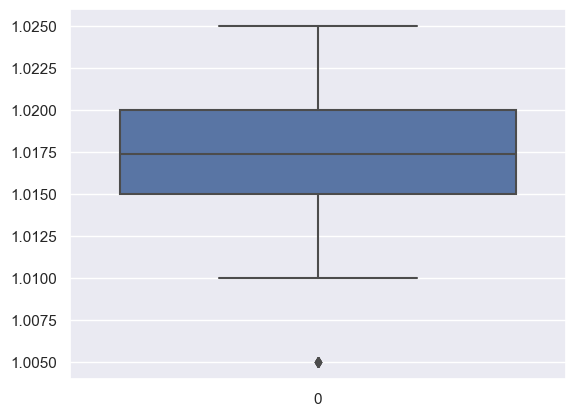

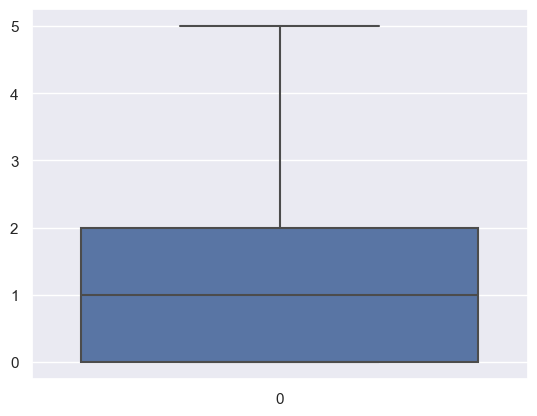

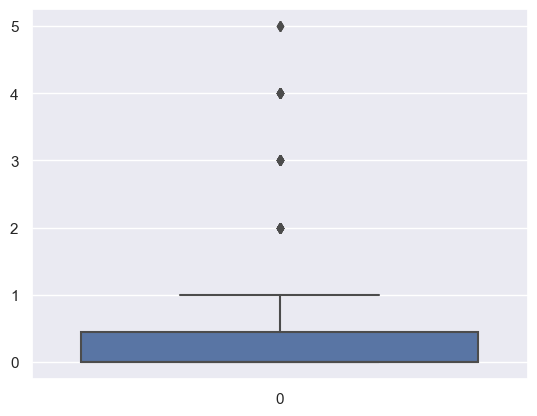

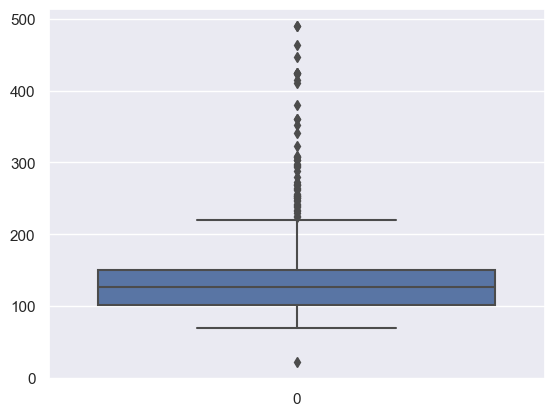

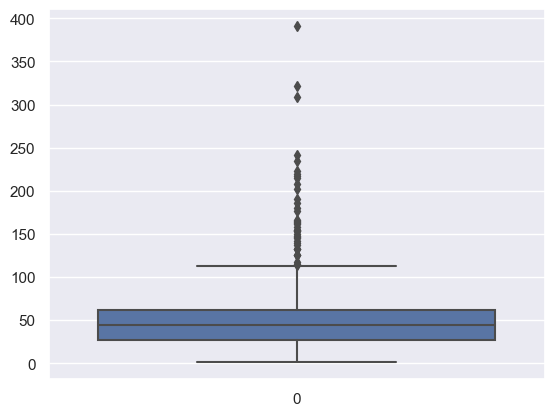

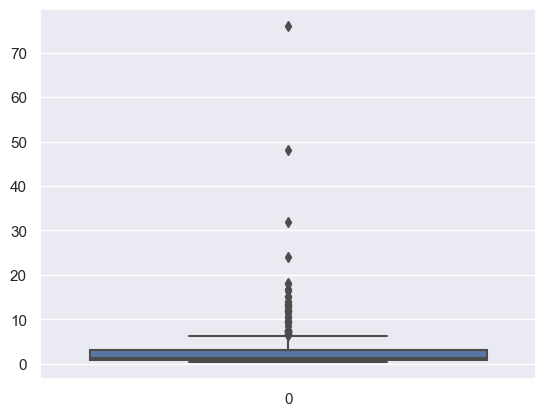

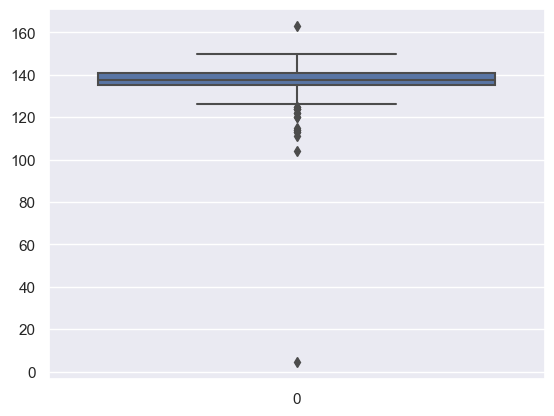

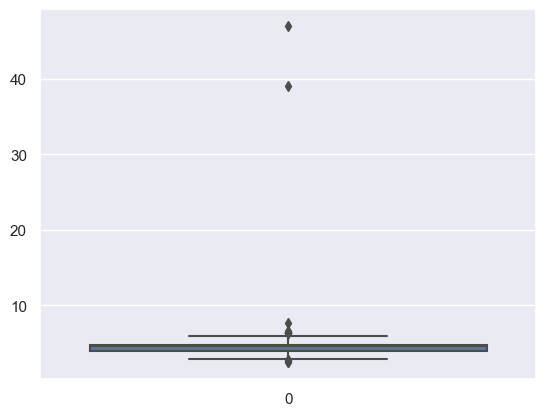

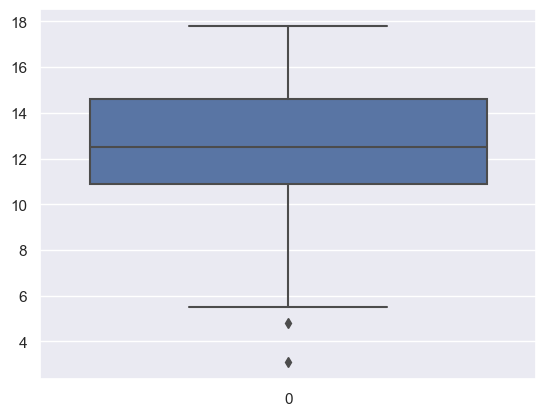

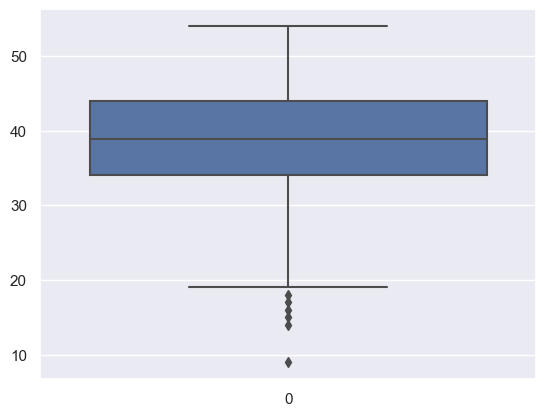

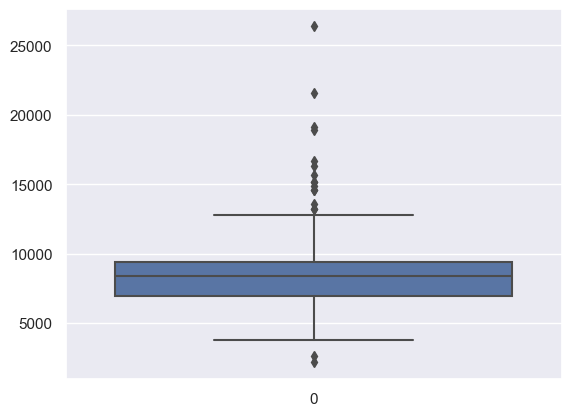

In [32]:
# Find the outlier

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [ ]:
# It is a clinical sector dataset so outlier present is normal
# Encoding:

#Label encoding to convert categorical values to numerical

In [33]:
from sklearn import preprocessing

df_enco = df.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,40,4,4,1,0,1,1,0,0,48,...,32,35,34,1,2,0,0,0,0,0
1,5,0,4,5,0,1,1,0,0,70,...,25,19,34,0,1,0,0,0,0,0
2,55,4,1,3,4,1,1,0,0,141,...,18,33,34,0,2,0,1,0,1,0
3,40,2,0,5,0,1,0,1,0,44,...,19,25,19,1,1,0,1,1,1,0
4,43,4,1,3,0,1,1,0,0,33,...,22,31,27,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,48,4,4,0,0,1,1,0,0,64,...,35,25,30,0,1,0,0,0,0,1
396,34,2,5,0,0,1,1,0,0,3,...,42,35,44,0,1,0,0,0,0,1
397,8,4,4,0,0,1,1,0,0,27,...,37,24,36,0,1,0,0,0,0,1
398,11,1,5,0,0,1,1,0,0,41,...,39,30,41,0,1,0,0,0,0,1


<Axes: >

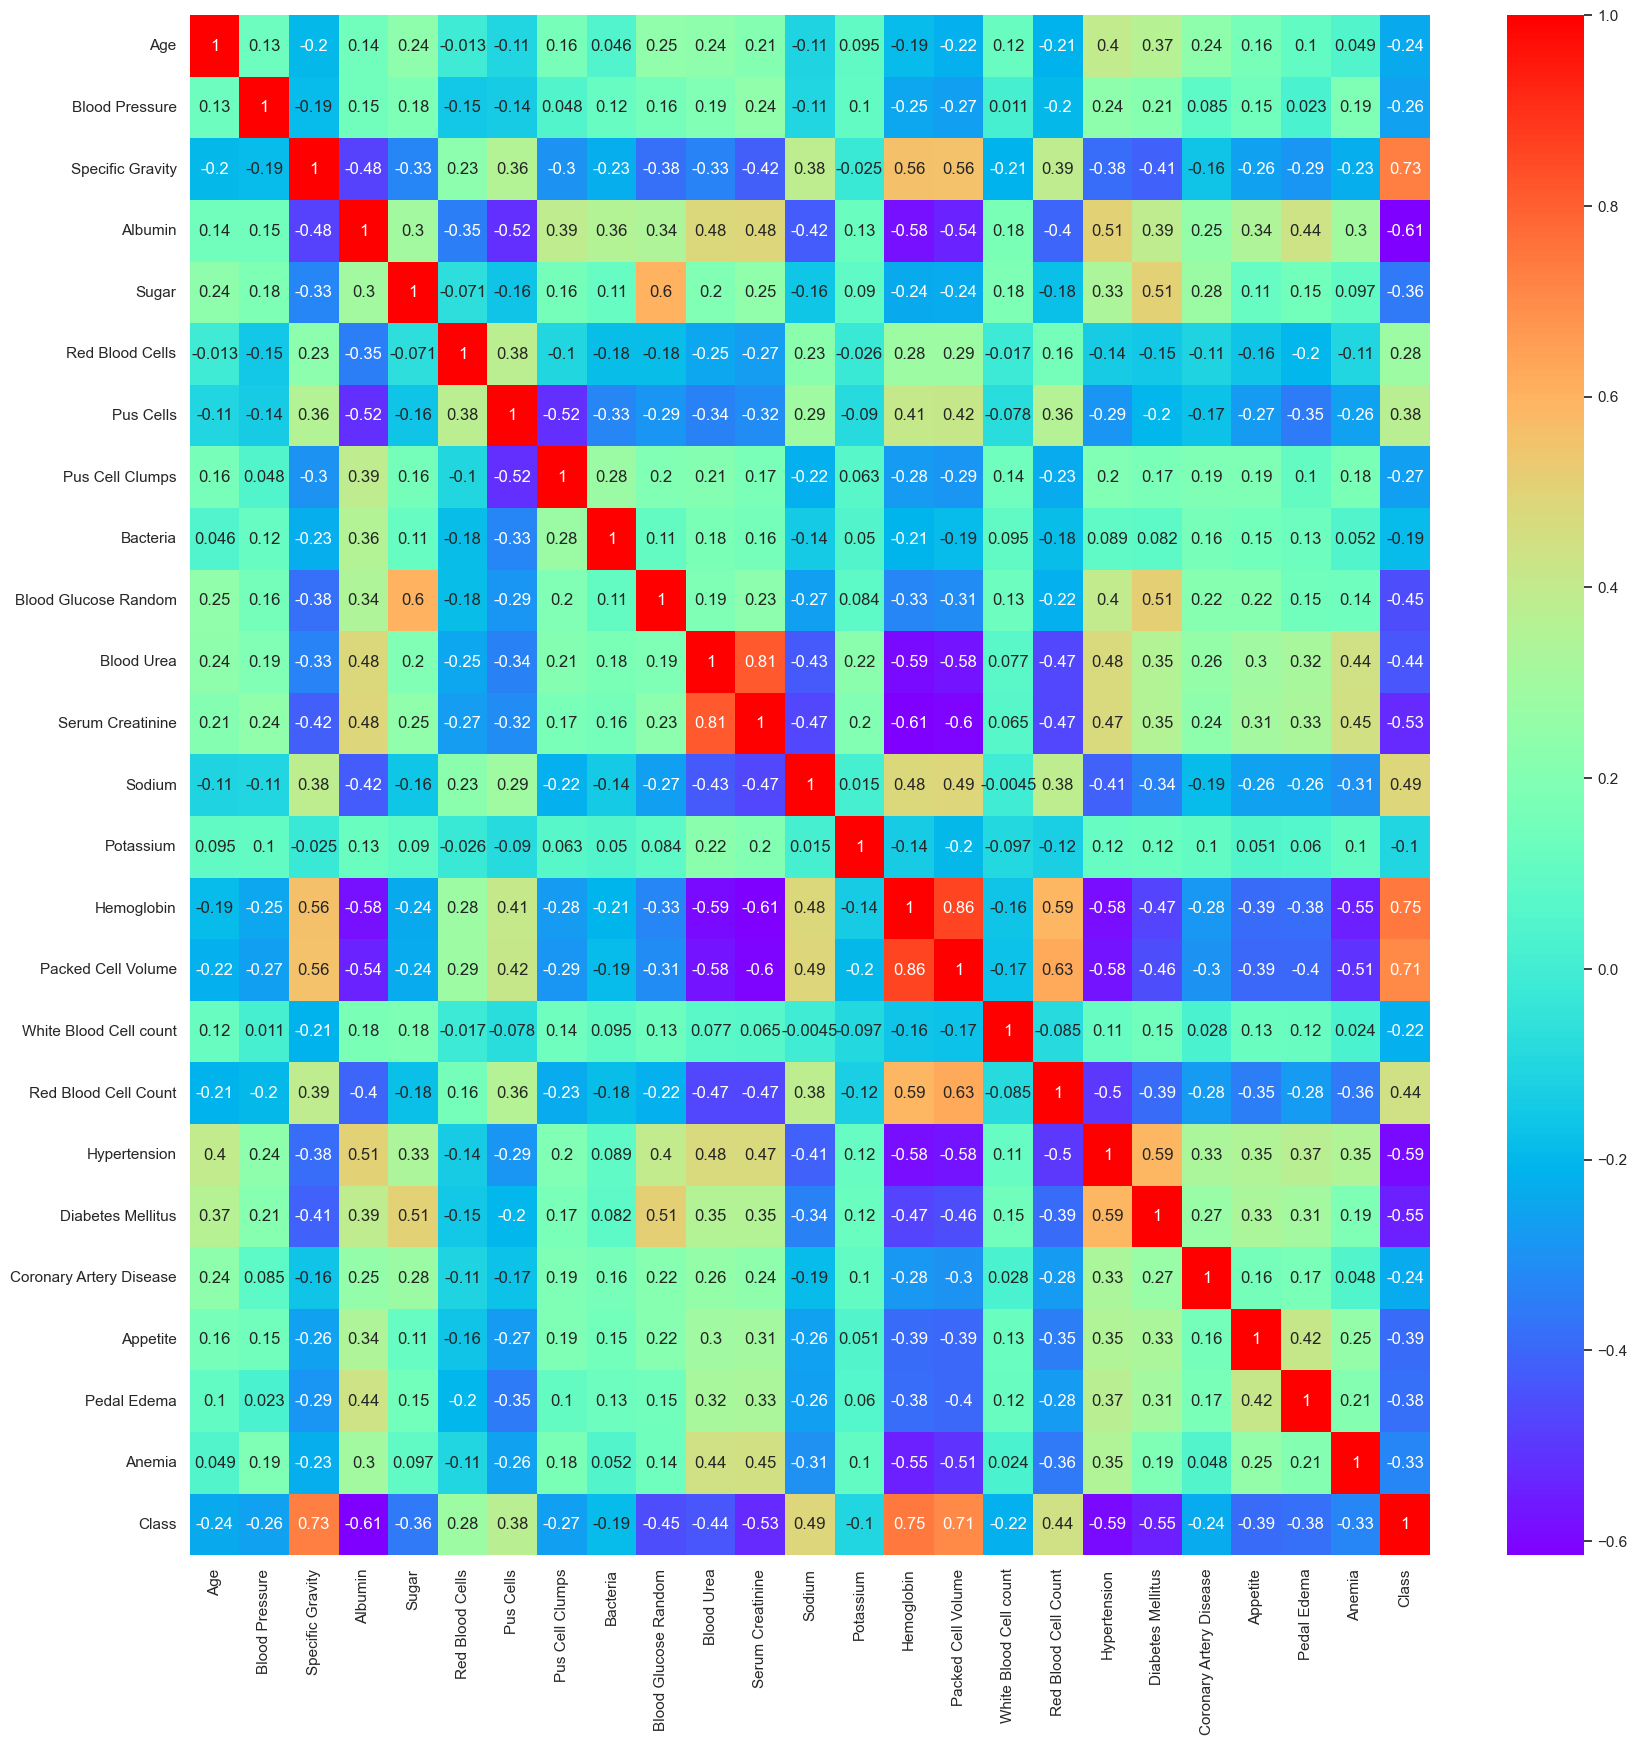

In [34]:
# Finding correlation:
plt.figure(figsize=(20,20))
corr = df_enco.corr()
sns.heatmap(corr,annot=True,cmap='rainbow')

In [35]:
# Seperate independant and dependant variables and drop class column.

x = df_enco.drop(['Class'], axis=1)
y = df_enco[['Class']]


In [36]:
x.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Hemoglobin,Packed Cell Volume,White Blood Cell count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
0,40,4,4,1,0,1,1,0,0,48,...,91,32,35,34,1,2,0,0,0,0
1,5,0,4,5,0,1,1,0,0,70,...,49,25,19,34,0,1,0,0,0,0
2,55,4,1,3,4,1,1,0,0,141,...,32,18,33,34,0,2,0,1,0,1
3,40,2,0,5,0,1,0,1,0,44,...,48,19,25,19,1,1,0,1,1,1
4,43,4,1,3,0,1,1,0,0,33,...,52,22,31,27,0,1,0,0,0,0


In [40]:
y.tail()

,Class
395,1
396,1
397,1
398,1
399,1


In [38]:
y.value_counts()/len(y)*100

Class
0        62.5
1        37.5
dtype: float64

In [42]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
# There is little/no imbalancy is present so we don't need to treat the part.




## Feature Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x)
y=y

In [45]:
x

array([[ 0.05263158, -0.2       ,  0.6       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.86842105, -1.        ,  0.6       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.44736842, -0.2       , -0.6       , ...,  1.        ,
        -1.        ,  1.        ],
       ...,
       [-0.78947368, -0.2       ,  0.6       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.71052632, -0.8       ,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.34210526, -0.2       ,  1.        , ..., -1.        ,
        -1.        , -1.        ]])

In [47]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


# Split the data into training and test for Model building

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2, random_state=23)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Models

In [52]:
# LogisticRegression

lr = LogisticRegression()

# DecisionTree

dtree = DecisionTreeClassifier()

# RandomForest

rf = RandomForestClassifier()

# BaggingClassifier

bagg = BaggingClassifier()

# KNN

knn = KNeighborsClassifier()

# SVM
#kernal - linear

svc = SVC()

# NAIVE BAYES THEOREM

# GaussianNB
naive_nb = GaussianNB()

# BernoulliNB
naive_bn = BernoulliNB()

# AdaBoostClassifier

ada = AdaBoostClassifier()

# GradientBoostingClassifier

gdb = GradientBoostingClassifier()

# XGBClassifier

xgb = XGBClassifier()



In [86]:
models=[('Logistic', lr),('DecisionTree',dtree),('RandomForest',rf), ('Bagging',bagg),('KNeighborsClassifier',knn),('SVM', svc),('GaussianNB',naive_nb),('BernoulliNB',naive_bn),('GradientBoosting',gdb),('XGBoosting',xgb),('AdaBoost',ada)]



In [87]:
evc = VotingClassifier(estimators=models, voting='hard')

In [88]:
models=[('Logistic', lr),('DecisionTree',dtree),('RandomForest',rf), ('Bagging',bagg),('KNeighborsClassifier',knn),('SVM', svc),('GaussianNB',naive_nb),('BernoulliNB',naive_bn),('GradientBoosting',gdb),('XGBoosting',xgb),('AdaBoost',ada)]

for model_name, model in models:
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    train_accuracy = accuracy_score(y_train,y_train_pred)
    
    y_test_pred = model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Model: {model_name}")
    print(f"Train Accuracy:{train_accuracy:.2f}")
    print(f"Test Accuracy:{test_accuracy:.2f}")
    
    print('*****'*10)

Model: Logistic
Train Accuracy:0.99
Test Accuracy:0.99
**************************************************
Model: DecisionTree
Train Accuracy:1.00
Test Accuracy:0.91
**************************************************
Model: RandomForest
Train Accuracy:1.00
Test Accuracy:0.99
**************************************************
Model: Bagging
Train Accuracy:1.00
Test Accuracy:0.99
**************************************************
Model: KNeighborsClassifier
Train Accuracy:0.99
Test Accuracy:0.99
**************************************************
Model: SVM
Train Accuracy:0.99
Test Accuracy:0.99
**************************************************
Model: GaussianNB
Train Accuracy:0.94
Test Accuracy:0.95
**************************************************
Model: BernoulliNB
Train Accuracy:0.96
Test Accuracy:0.96
**************************************************
Model: GradientBoosting
Train Accuracy:1.00
Test Accuracy:0.94
**************************************************
Model: XGBoosting
T

# Cross Validation on Accuracy:

In [89]:
from sklearn.model_selection import cross_val_score

for model_name, model in models:
    cv_train_scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
    cv_test_scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
    
    mean_train_accuracy = cv_train_scores.mean()
    mean_test_accuracy = cv_test_scores.mean()
    
    print(f"Model: {model_name}")
    print(f"Cross Validation Mean train accuracy: {mean_train_accuracy: .2f}")
    print(f"Cross Validation Mean test accuracy: {mean_test_accuracy: .2f}")
    print("_" * 50)
          
    


Model: Logistic
Cross Validation Mean train accuracy:  0.99
Cross Validation Mean test accuracy:  0.99
__________________________________________________
Model: DecisionTree
Cross Validation Mean train accuracy:  0.97
Cross Validation Mean test accuracy:  0.97
__________________________________________________
Model: RandomForest
Cross Validation Mean train accuracy:  0.99
Cross Validation Mean test accuracy:  0.99
__________________________________________________
Model: Bagging
Cross Validation Mean train accuracy:  0.97
Cross Validation Mean test accuracy:  0.98
__________________________________________________
Model: KNeighborsClassifier
Cross Validation Mean train accuracy:  0.98
Cross Validation Mean test accuracy:  0.98
__________________________________________________
Model: SVM
Cross Validation Mean train accuracy:  0.99
Cross Validation Mean test accuracy:  0.99
__________________________________________________
Model: GaussianNB
Cross Validation Mean train accuracy:  0.94


# ROC- AUC Curve for each models:

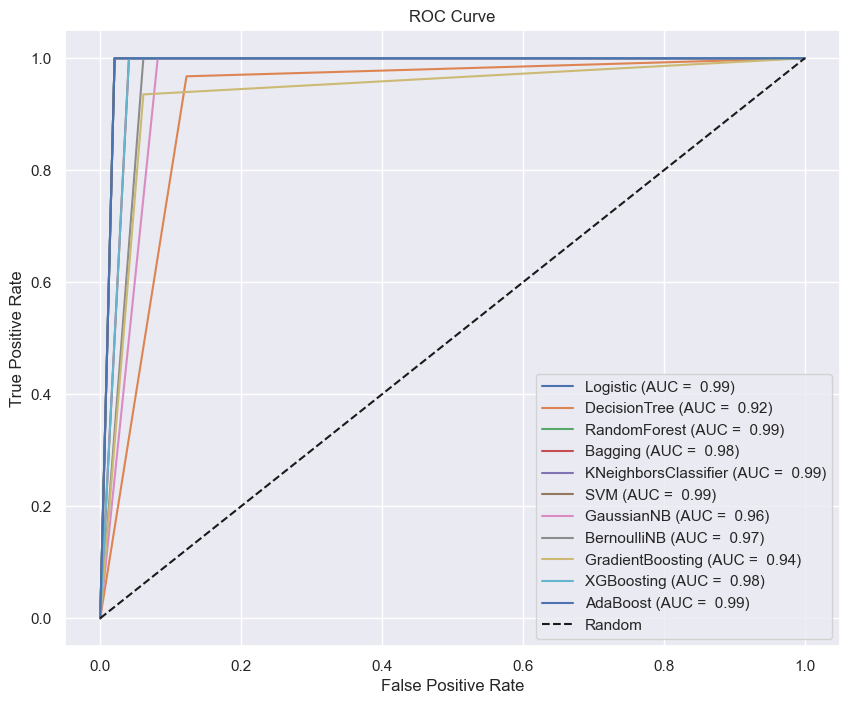

In [90]:
# Plot  ROC curves and calculate AUC for each model

from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(10,8))

for model_name, model in models:
    model.fit(x_train,y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    auc_score = roc_auc_score(y_test,y_test_pred)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score: .2f})')
    
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.show()

# Confusion Matrix:

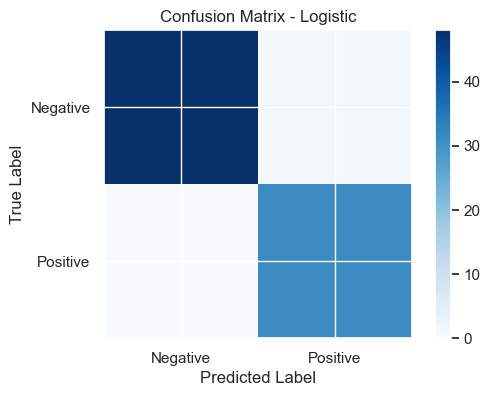

Model: Logistic
True Negative: 48
False Positive: 1
False Negative: 0
True Positive: 31
******************************


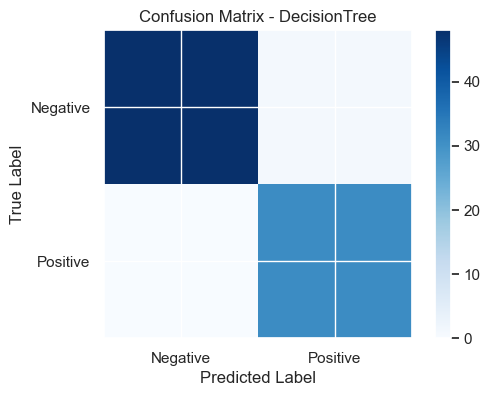

Model: DecisionTree
True Negative: 48
False Positive: 1
False Negative: 0
True Positive: 31
******************************


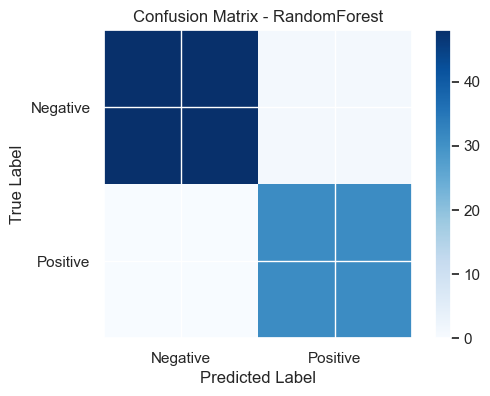

Model: RandomForest
True Negative: 48
False Positive: 1
False Negative: 0
True Positive: 31
******************************


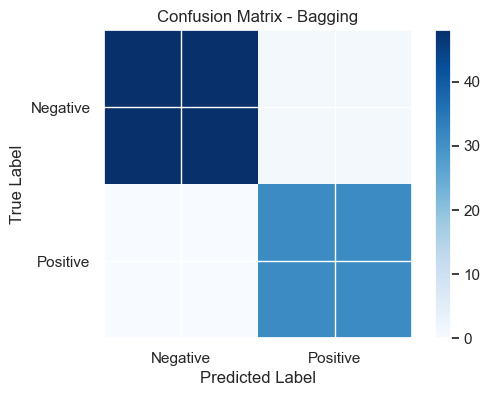

Model: Bagging
True Negative: 48
False Positive: 1
False Negative: 0
True Positive: 31
******************************


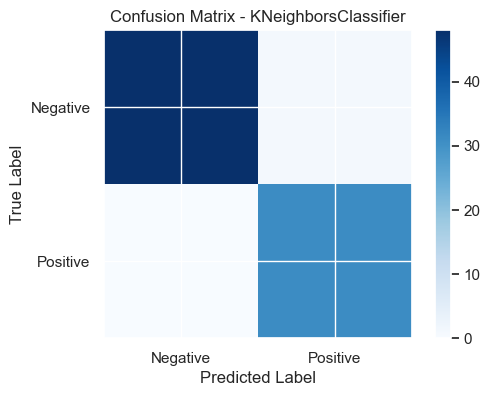

Model: KNeighborsClassifier
True Negative: 48
False Positive: 1
False Negative: 0
True Positive: 31
******************************


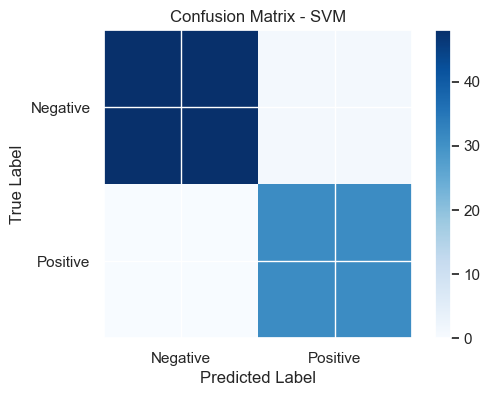

Model: SVM
True Negative: 48
False Positive: 1
False Negative: 0
True Positive: 31
******************************


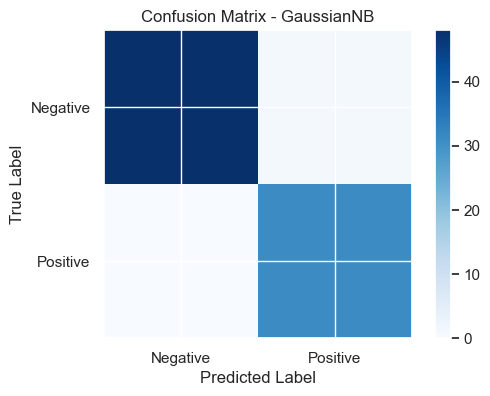

Model: GaussianNB
True Negative: 48
False Positive: 1
False Negative: 0
True Positive: 31
******************************


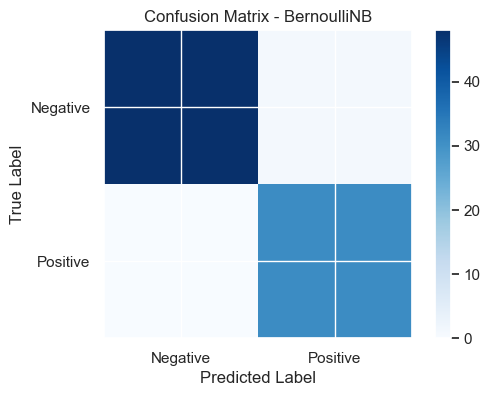

Model: BernoulliNB
True Negative: 48
False Positive: 1
False Negative: 0
True Positive: 31
******************************


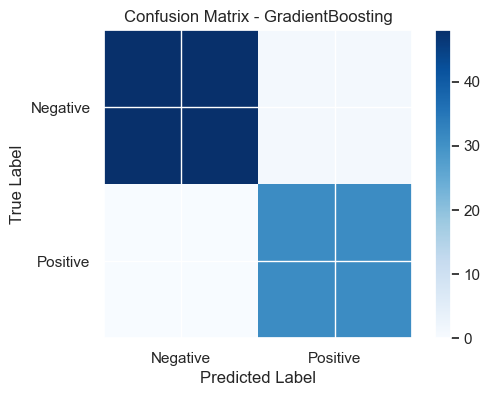

Model: GradientBoosting
True Negative: 48
False Positive: 1
False Negative: 0
True Positive: 31
******************************


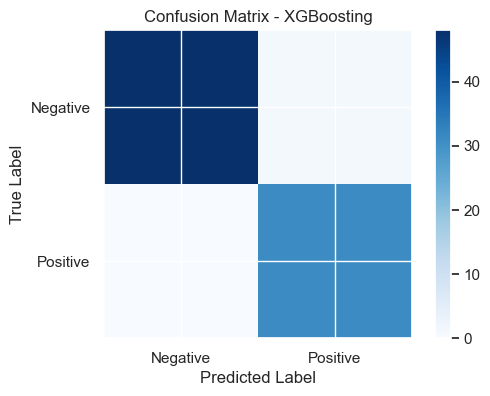

Model: XGBoosting
True Negative: 48
False Positive: 1
False Negative: 0
True Positive: 31
******************************


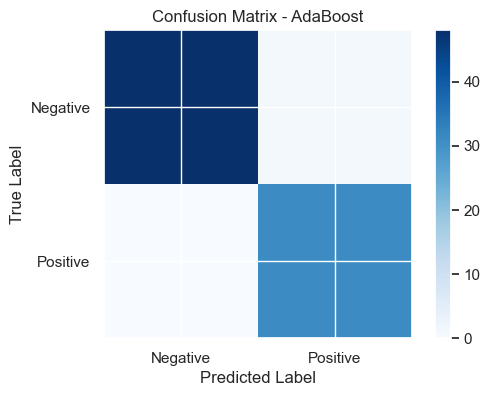

Model: AdaBoost
True Negative: 48
False Positive: 1
False Negative: 0
True Positive: 31
******************************


In [91]:
for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn , tp = con_mat.ravel()
    
    plt.figure(figsize=(6,4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    plt.xticks(np.arange(2), ['Negative', 'Positive'])
    plt.yticks(np.arange(2), ['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    print(f"Model: {model_name}")
    print(f"True Negative: {tn}")
    print(f"False Positive: {fp}")
    print(f"False Negative: {fn}")
    print(f"True Positive: {tp}")
    print("*" * 30)

# Compare F1 Score, Precession, REcall values of each model:


In [92]:
from sklearn.metrics import precision_score, recall_score,f1_score

for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    
    f1 = f1_score(y_test, y_pred_test)
    precision = precision_score(y_test,y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    
    print(f"Model: {model_name}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall: .2f}")
    print("*" * 30)

Model: Logistic
F1 Score: 0.98
Precision: 0.97
Recall:  1.00
******************************
Model: DecisionTree
F1 Score: 0.91
Precision: 0.88
Recall:  0.94
******************************
Model: RandomForest
F1 Score: 0.98
Precision: 0.97
Recall:  1.00
******************************
Model: Bagging
F1 Score: 0.98
Precision: 0.97
Recall:  1.00
******************************
Model: KNeighborsClassifier
F1 Score: 0.98
Precision: 0.97
Recall:  1.00
******************************
Model: SVM
F1 Score: 0.98
Precision: 0.97
Recall:  1.00
******************************
Model: GaussianNB
F1 Score: 0.94
Precision: 0.89
Recall:  1.00
******************************
Model: BernoulliNB
F1 Score: 0.95
Precision: 0.91
Recall:  1.00
******************************
Model: GradientBoosting
F1 Score: 0.92
Precision: 0.91
Recall:  0.94
******************************
Model: XGBoosting
F1 Score: 0.97
Precision: 0.94
Recall:  1.00
******************************
Model: AdaBoost
F1 Score: 0.98
Precision: 0.97
Reca

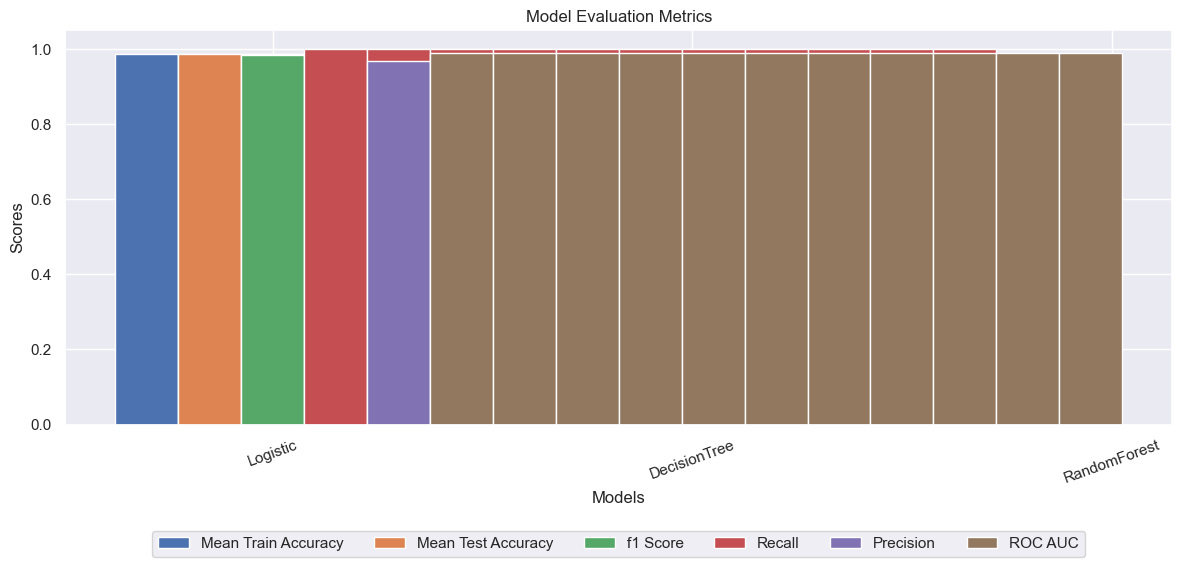

In [108]:
#Need to check Voting Classifier, as it is not reflecting in output.

# Now evaluating each model with their scores:

metrics = {
    'Mean Train Accuracy': [], 'Mean Test Accuracy':[], 'f1 Score': [], 'Recall': [], 'Precision': [], 'ROC AUC':[]
}

metrics['Mean Train Accuracy'].append(mean_train_accuracy)
metrics['Mean Test Accuracy'].append(mean_test_accuracy)
metrics['f1 Score'].append(f1)
metrics['Recall'].append(recall)
metrics['Precision'].append(precision)
metrics['ROC AUC'].append(auc_score)

# create bar plot for each metric

fig, ax = plt.subplots(figsize=(12,6))
width = 0.15
x = np.arange(len(models))

for idx, metric_name in enumerate(metrics.keys()):
    ax.bar((x + (idx - 2)) * width, metrics[metric_name], width, label = metric_name)
    
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels([model[0] for model in models])
plt.xticks(rotation=20)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=len(metrics))
ax.autoscale_view()

plt.tight_layout()   # adjust layput to avoid overlapping

plt.show()

In [ ]:
# Evaluation need to check, as reflecting only logistic, decision tree and RandomForest.